In [1]:
## This is all starter code.

import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* Yen futures returns. 

In [2]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
## Starter code.

yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

Open    High     Low    Last  Change  Settle  Volume  \
Date                                                                 
1976-08-02  3398.0  3401.0  3398.0  3401.0     NaN  3401.0     2.0   
1976-08-03  3401.0  3401.0  3401.0  3401.0     NaN  3401.0     0.0   
1976-08-04  3401.0  3401.0  3401.0  3401.0     NaN  3401.0     0.0   
1976-08-05  3401.0  3401.0  3401.0  3401.0     NaN  3401.0     0.0   
1976-08-06  3401.0  3401.0  3401.0  3401.0     NaN  3401.0     0.0   

            Previous Day Open Interest  
Date                                    
1976-08-02                         1.0  
1976-08-03                         1.0  
1976-08-04                         1.0  
1976-08-05                         1.0  
1976-08-06                         1.0

In [3]:
# Trim the dataset to begin on January 1st, 1990
## Starter code.

yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

Open    High     Low    Last  Change  Settle   Volume  \
Date                                                                  
1990-01-02  6954.0  6954.0  6835.0  6847.0     NaN  6847.0  48336.0   
1990-01-03  6877.0  6910.0  6865.0  6887.0     NaN  6887.0  38206.0   
1990-01-04  6937.0  7030.0  6924.0  7008.0     NaN  7008.0  49649.0   
1990-01-05  6952.0  6985.0  6942.0  6950.0     NaN  6950.0  29944.0   
1990-01-08  6936.0  6972.0  6936.0  6959.0     NaN  6959.0  19763.0   

            Previous Day Open Interest  
Date                                    
1990-01-02                     51473.0  
1990-01-03                     53860.0  
1990-01-04                     55699.0  
1990-01-05                     53111.0  
1990-01-08                     52072.0

# Data Preparation

### Returns

In [4]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
## I'm calling this returns_df

returns_df = (yen_futures[['Settle']].pct_change() * 100)
returns_df = returns_df.replace(-np.inf, np.nan).dropna()
returns_df.head()

Settle
Date                
1990-01-03  0.584197
1990-01-04  1.756933
1990-01-05 -0.827626
1990-01-08  0.129496
1990-01-09 -0.632275

In [5]:
## That's confusing, because the Settle values have changed from the initial yen_futures df.
## I want to rename the column Settle to Return %
## Didn't work; I forgot "inplace=True"

returns_df.rename(columns={'Settle':'Return_Pct'},inplace=True)
returns_df.head()

Return_Pct
Date                  
1990-01-03    0.584197
1990-01-04    1.756933
1990-01-05   -0.827626
1990-01-08    0.129496
1990-01-09   -0.632275

In [6]:
## It worked!

### Lagged Returns 

In [7]:
# Create a lagged return using the shift function
## I did this in the first homework! Google it again ...

yen_futures['Settle'] = returns_df['Return_Pct']
yen_futures['Lagged_Return'] = returns_df['Return_Pct'].shift()
yen_futures.head()

Open    High     Low    Last  Change    Settle   Volume  \
Date                                                                    
1990-01-02  6954.0  6954.0  6835.0  6847.0     NaN       NaN  48336.0   
1990-01-03  6877.0  6910.0  6865.0  6887.0     NaN  0.584197  38206.0   
1990-01-04  6937.0  7030.0  6924.0  7008.0     NaN  1.756933  49649.0   
1990-01-05  6952.0  6985.0  6942.0  6950.0     NaN -0.827626  29944.0   
1990-01-08  6936.0  6972.0  6936.0  6959.0     NaN  0.129496  19763.0   

            Previous Day Open Interest  Lagged_Return  
Date                                                   
1990-01-02                     51473.0            NaN  
1990-01-03                     53860.0            NaN  
1990-01-04                     55699.0       0.584197  
1990-01-05                     53111.0       1.756933  
1990-01-08                     52072.0      -0.827626

In [8]:
## I need to drop the NaN ...
yen_futures.dropna(inplace=True)
yen_futures.head()

Open    High     Low    Last  Change    Settle    Volume  \
Date                                                                     
2014-02-18  9831.0  9865.0  9734.0  9775.0    42.0 -0.427829  203495.0   
2014-02-19  9768.0  9825.0  9760.0  9773.0     2.0 -0.020460  129508.0   
2014-02-20  9774.0  9837.0  9765.0  9775.0     2.0  0.020465  160202.0   
2014-02-21  9772.0  9776.0  9725.0  9758.0    20.0 -0.204604  103091.0   
2014-02-24  9752.0  9789.0  9740.0  9757.0     2.0  0.020502   90654.0   

            Previous Day Open Interest  Lagged_Return  
Date                                                   
2014-02-18                    196924.0       0.409123  
2014-02-19                    197197.0      -0.427829  
2014-02-20                    198280.0      -0.020460  
2014-02-21                    202990.0       0.020465  
2014-02-24                    203114.0      -0.204604

### Train Test Split

In [9]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
## The starter code read as follows ...
## train = yen_futures[:'2017']
## test = yen_futures['2018':]
## ... I need to change both to 2018, I think.

train = yen_futures[:'2018']
test = yen_futures['2018':]

In [10]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):

X_train = train["Lagged_Return"].to_frame()
X_test = test["Lagged_Return"].to_frame()
Y_train = train["Settle"]
Y_test = test["Settle"]

In [11]:
## Starter code.
X_train

Lagged_Return
Date                     
2014-02-18       0.409123
2014-02-19      -0.427829
2014-02-20      -0.020460
2014-02-21       0.020465
2014-02-24      -0.204604
...                   ...
2018-12-24      -0.187545
2018-12-26       0.834485
2018-12-27      -0.893346
2018-12-28       0.464525
2018-12-31       0.297242

[1219 rows x 1 columns]

# Linear Regression Model

In [12]:
# Create a Linear Regression model and fit it to the training data
## I'm getting a "No module named sklearn" error, so I'm trying a pip install.

!pip install sklearn

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
## It worked!

In [15]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
## I had to Google this; found https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
## I'm not sure what I expected.

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [17]:
# Make a prediction of "y" values using just the test dataset
## I got help from my group on this one-- it seems like "predictions" is just the name of the df

predictions = model.predict(X_test)

In [18]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
## First I need to get my data out, and see what kind of data it is.

results = Y_test.to_frame()
results["Predicted Return"] = predictions
predictions

array([-6.70674117e-03, -7.56823410e-03, -1.17062066e-03, -1.49718917e-03,
        1.79105453e-04, -4.76932324e-03, -8.65667506e-03, -1.78532439e-02,
       -6.80372229e-03, -4.22907675e-03, -1.20640476e-02,  4.66651765e-03,
       -5.08561043e-03, -8.24414062e-03,  2.97410469e-04, -1.12069315e-02,
       -1.78382597e-02,  1.08258216e-04, -1.21452668e-02, -1.06589120e-03,
       -5.84120115e-03, -3.53130321e-04, -5.35921723e-04,  5.12277815e-03,
       -1.01162873e-02, -7.80701180e-03, -3.25285835e-03, -9.68053791e-03,
       -7.39198885e-03, -2.74267655e-03, -1.47405490e-02, -1.08088097e-02,
       -1.29955271e-02, -3.33743325e-03,  6.70157854e-03,  1.63872794e-03,
       -1.65786192e-02, -2.89126447e-03, -2.00245203e-03,  1.55795518e-03,
       -1.23276845e-02, -8.34100143e-03, -1.18616199e-02,  3.43371025e-03,
       -3.84213528e-03, -5.79942161e-03, -1.88797405e-03,  1.90545639e-03,
       -8.47485179e-03, -1.24896588e-03, -7.83481437e-03, -3.90515047e-03,
       -5.73773123e-03, -

In [19]:
## It's an array.
## Now, I need to convert that array to a dataframe using Pandas (Thanks, Google!).

predictions_df = pd.DataFrame(predictions)
predictions_df.head()

0
0 -0.006707
1 -0.007568
2 -0.001171
3 -0.001497
4  0.000179

In [20]:
predictions_df.columns = ['Predictions']
predictions_df.head()

Predictions
0    -0.006707
1    -0.007568
2    -0.001171
3    -0.001497
4     0.000179

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E509A90E88>,
      dtype=object)

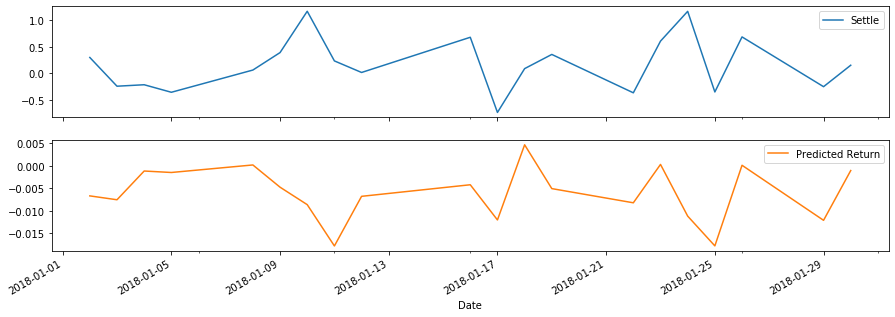

In [21]:
# Plot the first 20 predictions vs the true values
## Again, basically getting this from the group.

results[:20].plot(subplots=True, figsize=(15,5))

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [22]:
## Separating this cell for troubleshooting purposes.

from sklearn.metrics import mean_squared_error

In [25]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
## I'm using the names they're giving us.

mse = mean_squared_error(
    results["Settle"],
    results["Predicted Return"]
)

In [26]:
## Let's see what we've got.
mse

0.17238552644349286

In [28]:
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
## Just applying the square root function here, from https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html
rmse = np.sqrt(mse)
rmse

0.4151933603075715

# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [40]:
# Construct a dataframe using just the "y" training data:
## Reading ahead, it wants "in-sample" predictions, so I'm naming the df that for simplicity

in_sample_predictions = Y_train.to_frame()
in_sample_predictions.head()

Settle
Date                
2014-02-18 -0.427829
2014-02-19 -0.020460
2014-02-20  0.020465
2014-02-21 -0.204604
2014-02-24  0.020502

In [36]:
# Add a column of "in-sample" predictions to that dataframe:
in_sample_predictions["In-sample Predictions"] = model.predict(X_train)

In [38]:
# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_predictions["Settle"],
    in_sample_predictions["In-sample Predictions"]
)

## Let's see what that looks like.
in_sample_mse

0.32008015896905967

In [46]:
## It worked!

In [34]:
# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
in_sample_rmse

0.5657562717010388

# Conclusions

YOUR CONCLUSIONS HERE!

In [ ]:
## The out-of-sample data gives back .17 and .41, vs. the in-sample that gave back .32 and .56.
## My understanding is that lower is better, in this case, so closer to 0 error is preferred.
## Out of sample is better.